## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('test1data.csv')

In [ ]:
dataset

,T,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,P,C
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,NaN,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,369,1.255729,0.297650,0.287526,0.699902,-0.438405,-1.088542,0.034421,-0.159596,0.149990,-0.260028,-0.202845,-0.178270,-0.546817,-0.133805,1.179253,0.516410,0.036999,-0.202477,-0.191225,-0.129759,-0.296736,-0.894374,0.137806,0.318641,0.190562,0.097319,-0.028174,0.029141,1.98,0
996,370,1.354445,-0.815297,0.836498,-0.617140,-1.304124,-0.025274,-1.147177,0.162996,-0.258341,0.660341,0.632540,-0.056930,-0.351267,-0.466689,-0.835734,1.157377,0.186554,-0.579700,1.077009,0.040379,0.292038,0.941357,-0.192851,0.049422,0.597416,0.002149,0.035182,0.003682,4.79,0
997,373,1.149246,0.018358,0.430440,0.537503,-0.430754,-0.394699,-0.151398,0.135031,-0.004959,0.113950,1.559069,0.267602,-1.601212,0.853252,0.653695,0.128873,-0.174430,-0.343327,-0.243970,-0.219044,-0.124932,-0.449760,0.135781,0.185130,0.129062,0.177780,-0.034565,0.001487,10.29,0
998,373,-1.254476,0.322250,1.784507,-0.307396,1.009086,-0.998491,0.328482,0.131284,-0.485255,-1.028343,-0.198156,-0.360171,-0.663443,-0.227584,0.871873,0.352768,0.114134,-0.543103,-1.038336,0.032603,-0.160980,-0.778999,-0.025359,0.000828,0.154781,0.042034,-0.019550,0.081176,1.79,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1000 non-null   int64  
 1   V1      1000 non-null   float64
 2   V2      1000 non-null   float64
 3   V3      1000 non-null   float64
 4   V4      1000 non-null   float64
 5   V5      1000 non-null   float64
 6   V6      1000 non-null   float64
 7   V7      1000 non-null   float64
 8   V8      1000 non-null   float64
 9   V9      1000 non-null   float64
 10  V10     1000 non-null   float64
 11  V11     1000 non-null   float64
 12  V12     1000 non-null   float64
 13  V13     1000 non-null   float64
 14  V14     1000 non-null   float64
 15  V15     1000 non-null   float64
 16  V16     1000 non-null   float64
 17  V17     1000 non-null   float64
 18  V18     1000 non-null   float64
 19  V19     1000 non-null   float64
 20  V20     1000 non-null   float64
 21  V21     1000 non-null   float64
 22  V

In [ ]:
# Count of each type of variable in C
targetvariable = dataset["C"].value_counts().head(10)
targetvariable

0    507
1    473
Name: C, dtype: int64

## Taking care of missing data

In [ ]:
# total missing values
total = dataset.isnull().sum().sort_values(ascending = False)
# percentage of missing values
perc = ((dataset.isnull().sum()/dataset.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, perc], axis = 1, keys = ["Total", "Percentage %"])

In [ ]:
print(missing_data)

     Total  Percentage %
P       20           2.0
T        0           0.0
V16      0           0.0
V28      0           0.0
V27      0           0.0
V26      0           0.0
V25      0           0.0
V24      0           0.0
V23      0           0.0
V22      0           0.0
V21      0           0.0
V20      0           0.0
V19      0           0.0
V18      0           0.0
V17      0           0.0
V15      0           0.0
V1       0           0.0
V14      0           0.0
V13      0           0.0
V12      0           0.0
V11      0           0.0
V10      0           0.0
V9       0           0.0
V8       0           0.0
V7       0           0.0
V6       0           0.0
V5       0           0.0
V4       0           0.0
V3       0           0.0
V2       0           0.0
C        0           0.0


We can see that there are missing values existing in the column of P. There are a total of 1000 rows in our dataset and 20 of them contain missing values in the column P. Since our dataset already contains P in a very vast range, as it has not been feature scaled yet, we can drop the 20 null values.

In [ ]:
# Dropping the rows with the null values in the column P
dataset = dataset.dropna(subset=['P'])

In [ ]:
# Let us check for the percentage of missing data again
# total missing values
total1 = dataset.isnull().sum().sort_values(ascending = False)
# percentage of missing values
perc1 = ((dataset.isnull().sum()/dataset.isnull().count())*100).sort_values(ascending = False)
missing_data1 = pd.concat([total1, perc1], axis = 1, keys = ["Total", "Percentage %"])

In [ ]:
print(missing_data1)

     Total  Percentage %
T        0           0.0
V16      0           0.0
P        0           0.0
V28      0           0.0
V27      0           0.0
V26      0           0.0
V25      0           0.0
V24      0           0.0
V23      0           0.0
V22      0           0.0
V21      0           0.0
V20      0           0.0
V19      0           0.0
V18      0           0.0
V17      0           0.0
V15      0           0.0
V1       0           0.0
V14      0           0.0
V13      0           0.0
V12      0           0.0
V11      0           0.0
V10      0           0.0
V9       0           0.0
V8       0           0.0
V7       0           0.0
V6       0           0.0
V5       0           0.0
V4       0           0.0
V3       0           0.0
V2       0           0.0
C        0           0.0


Thus, we can see now that there are no longer any missing values in our data. 
There fore we can move on to splitting our data into X and Y

## Exploratory Data Analysis

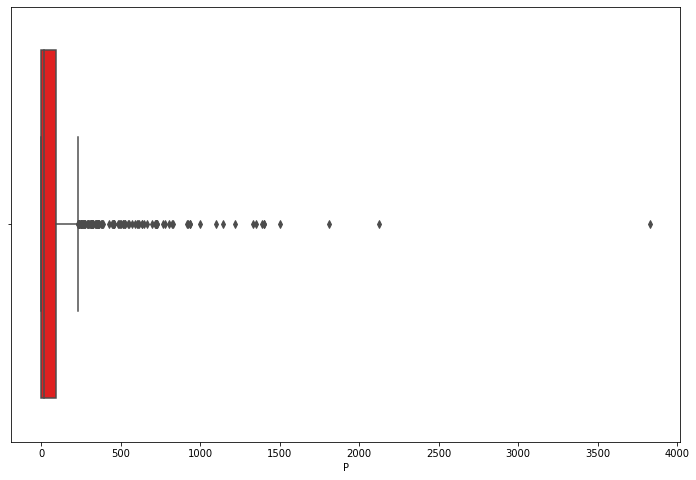

In [ ]:
# Our outliers lie mostly in the P column and thus we can plot a boxplot in this case
# Checking for the outliers
plt.figure(figsize= (12,8))
sns.boxplot(x = dataset.P, color='red')
plt.show()

Since there are a lot of outliers in this column, we need to perform feature scaling in order to bring them down to a range

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

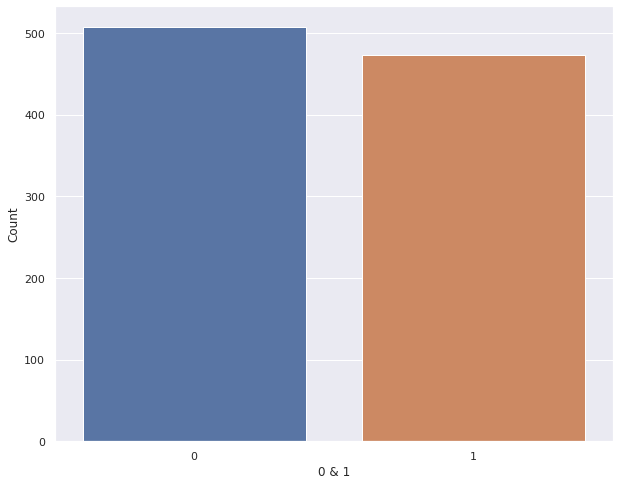

In [ ]:
# creating the countplot of the target values i.e., the two classes.
sns.set_theme(style= 'darkgrid')
plt.figure(figsize=(10, 8))
sns.countplot(dataset.C)
plt.xlabel("0 & 1")
plt.ylabel("Count")

In [ ]:
# finding correlation matrix of numerical columns in training data set
dataset.corr()

,T,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,P,C
T,1.000000,-0.186825,0.226919,-0.365172,0.434241,-0.120320,-0.276632,-0.251163,-0.063666,-0.347690,-0.374466,0.359528,-0.402276,-0.080526,-0.484566,-0.189551,-0.320226,-0.288337,-0.178842,0.191205,0.109136,0.069649,0.129497,0.039055,-0.080767,-0.158969,0.008230,-0.068731,0.104384,0.120202,0.768975
V1,-0.186825,1.000000,-0.815410,0.888299,-0.624711,0.869736,0.359029,0.892281,-0.127101,0.668695,0.741618,-0.537820,0.610212,-0.087702,0.468692,0.179508,0.646989,0.687759,0.682816,-0.320956,-0.292696,-0.024653,-0.022960,-0.039053,-0.060108,-0.029005,0.061145,0.174509,0.182672,-0.050728,-0.437496
V2,0.226919,-0.815410,1.000000,-0.869649,0.682973,-0.813270,-0.336422,-0.855055,0.021366,-0.712287,-0.763136,0.632714,-0.681948,0.071466,-0.586628,-0.204112,-0.644751,-0.652688,-0.631621,0.243817,0.262716,0.086716,-0.035338,0.142719,-0.018725,0.066126,-0.020111,-0.141138,0.011255,-0.208813,0.482629
V3,-0.365172,0.888299,-0.869649,1.000000,-0.795342,0.857035,0.501964,0.899063,-0.213203,0.793102,0.873200,-0.744535,0.792951,-0.116839,0.693538,0.189938,0.742280,0.756591,0.708188,-0.335234,-0.335771,-0.011528,-0.053373,-0.018711,0.024374,-0.048506,0.006787,0.083330,0.094276,-0.041704,-0.617638
V4,0.434241,-0.624711,0.682973,-0.795342,1.000000,-0.608808,-0.469815,-0.729729,0.142046,-0.815975,-0.802737,0.796754,-0.844757,0.093102,-0.793635,-0.221088,-0.738984,-0.718408,-0.656901,0.354766,0.269157,-0.002836,0.160685,0.021537,-0.073872,-0.089609,0.122313,-0.002493,-0.048314,0.043451,0.683035
V5,-0.120320,0.869736,-0.813270,0.857035,-0.608808,1.000000,0.353640,0.842209,-0.251196,0.684548,0.766657,-0.547531,0.632524,-0.151163,0.459555,0.149117,0.701004,0.751641,0.751685,-0.400078,-0.286478,0.010271,-0.094727,-0.071705,-0.116302,-0.064544,0.041897,0.166257,0.147280,-0.116953,-0.391786
V6,-0.276632,0.359029,-0.336422,0.501964,-0.469815,0.353640,1.000000,0.352044,-0.549506,0.425903,0.477988,-0.544030,0.542309,-0.143928,0.565227,-0.028768,0.464312,0.461011,0.388291,-0.210409,-0.135840,0.048418,-0.059248,0.280919,-0.025465,-0.072274,-0.035541,-0.130173,-0.059769,0.170421,-0.456628
V7,-0.251163,0.892281,-0.855055,0.899063,-0.729729,0.842209,0.352044,1.000000,0.032174,0.785449,0.875946,-0.659337,0.739249,-0.060256,0.575694,0.240989,0.763085,0.783176,0.770697,-0.359245,-0.326384,-0.015209,-0.100748,-0.077873,-0.038727,0.076816,0.033022,0.210103,0.116168,0.100923,-0.496292
V8,-0.063666,-0.127101,0.021366,-0.213203,0.142046,-0.251196,-0.549506,0.032174,1.000000,-0.132647,-0.102065,0.186920,-0.186443,0.266871,-0.188704,0.112751,-0.194098,-0.245391,-0.209844,0.222894,0.044881,-0.194609,0.114019,-0.415959,0.070659,0.221455,0.042359,0.264495,0.003207,0.033595,0.072533
V9,-0.347690,0.668695,-0.712287,0.793102,-0.815975,0.684548,0.425903,0.785449,-0.132647,1.000000,0.876987,-0.724486,0.797363,-0.116207,0.685792,0.172304,0.748429,0.785013,0.728810,-0.359822,-0.339757,0.126934,-0.252725,-0.044037,0.013962,0.062866,-0.097661,0.126662,0.102620,0.006211,-0.564575


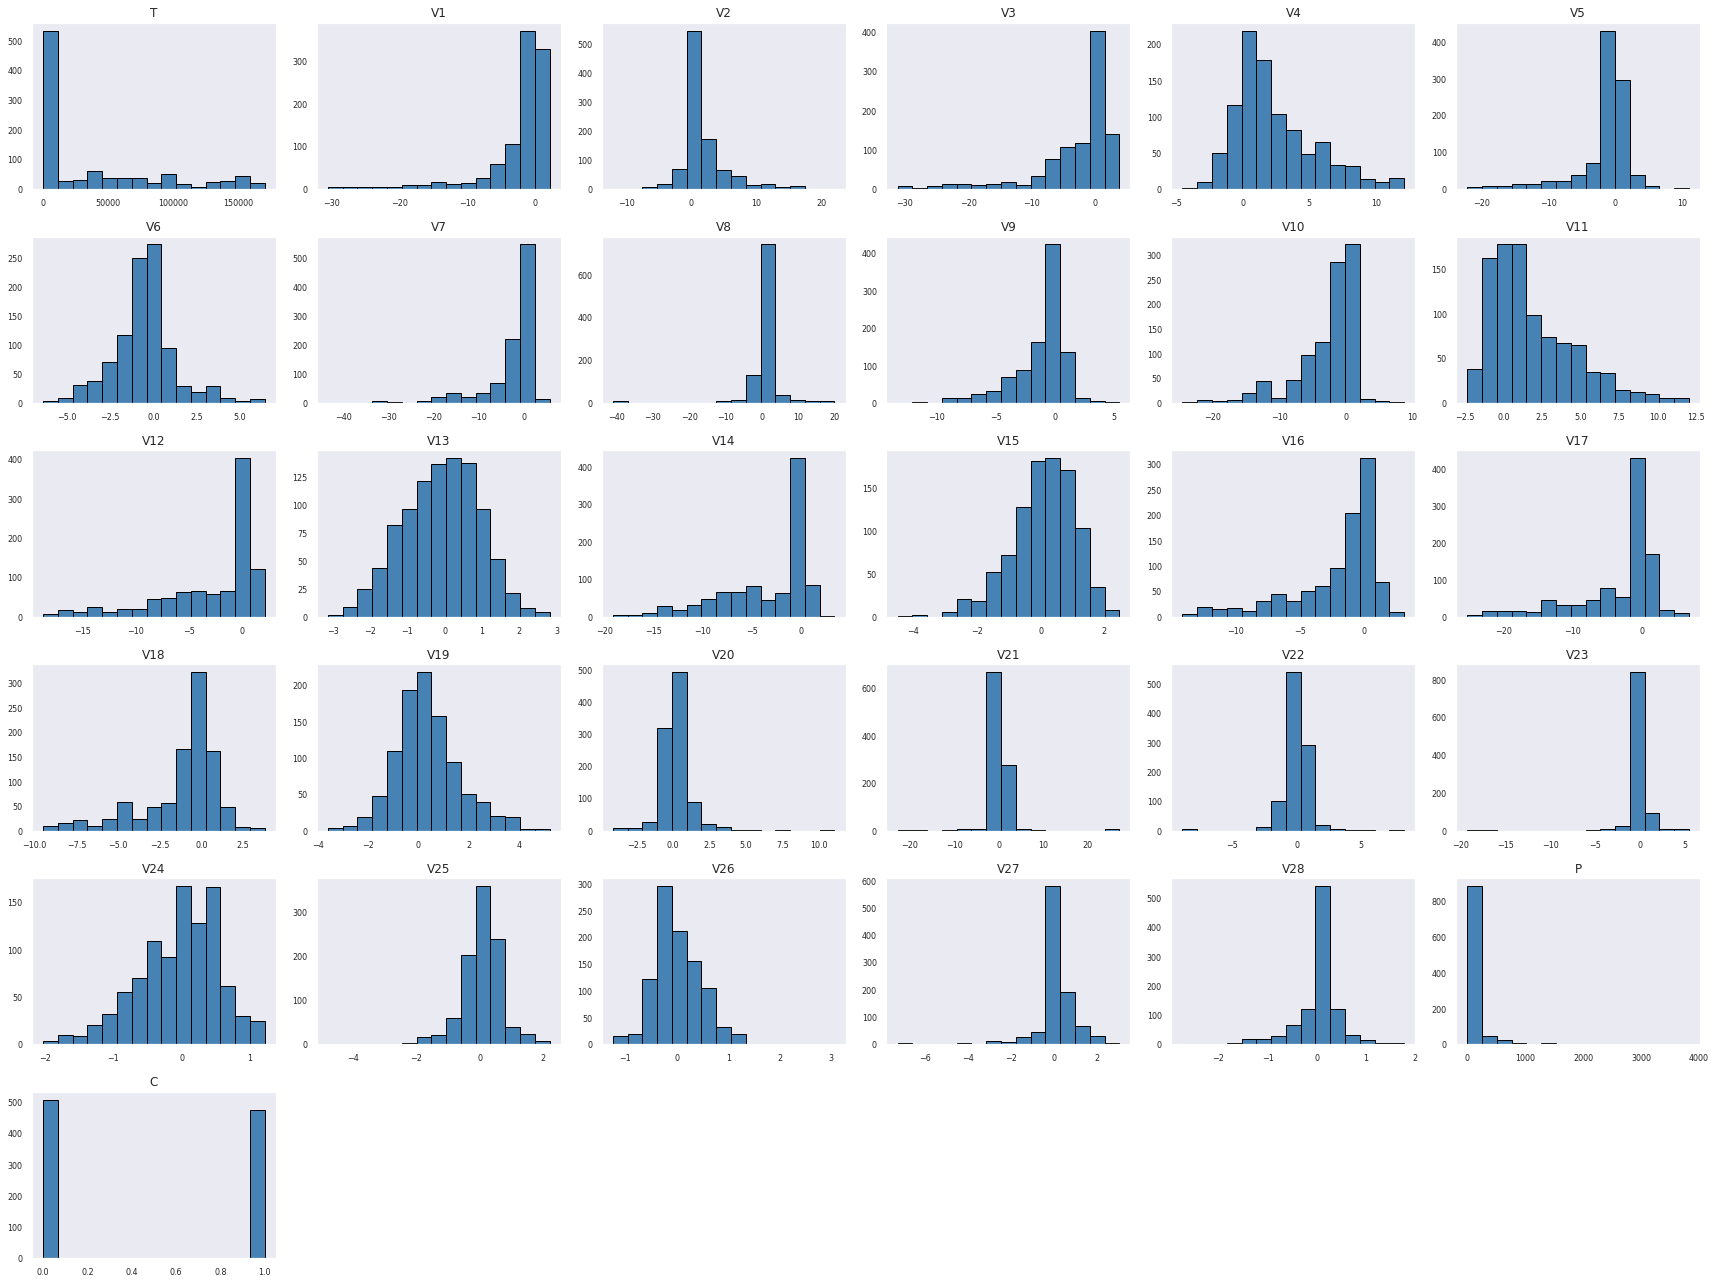

In [ ]:
dataset.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, figsize = (20,15))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

From this histogram, we can infer certain things about out dataset features. A few of them are as follows:
*  V25 is normally distributed
*  V17 is left skewed
*  V22 is right skewed

We can see here that our column C only contains binary values and thus this is our Y or target variable.

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Principal component Analysis (PCA)

## Applying PCA on our dataset

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Here, we shall choose our n_components as 2. This is because, if we increase it to 3, we shall raise a ValueError that says n_components=3 must be between 0 and min(n_samples, n_features)=2. 

In [ ]:
cov_matrix = np.cov(dataset, rowvar=False)
cov_matrix.shape

(31, 31)

In [ ]:
values, vectors = np.linalg.eig(cov_matrix)

In [ ]:
# Let's take the top 3 eigenvectors and project data onto them.
top_3_vectors = vectors[:,np.array([0,1,2])]

In [ ]:
# Project data down to 3 axes by computing dot product
principal_comp = np.dot(dataset, top_3_vectors)

In [ ]:
print(principal_comp.shape)

(980, 3)


In [ ]:
import plotly.express as pex

In [ ]:
pex.scatter_3d(x=principal_comp[:,0],y=principal_comp[:,1],z=principal_comp[:,2],color=dataset.C, color_continuous_scale=pex.colors.sequential.Viridis)

## Training the Logistic Regression model on our dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

We have used the Logistic Regression model since it is best suited for binary classification. Our target variable column C has two values - 0 and 1 only

## Making the Confusion Matrix and finding the accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[109   0]
 [ 11  76]]


0.9438775510204082

Thus, we can see that our model has a 94% accuracy in this case of Feature Extraction

## Linear Discriminant Analysis

In [ ]:
# Splitting the data into our independent and dependent variables again
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)

## Applying LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train_1 = lda.fit_transform(X_train_1, y_train_1)
X_test_1 = lda.transform(X_test_1)

Here, we have just one attribute, thus the graph would be a 1-D graph which is a number line. With just one attribute, although we were able to separate the categories certain points have been over-lapped due to no specific cut-off point. In reality, there could be many such overlapped data points when there is a large number of observations in the data set. Thus, it cannot be visualized here
If we increase the value of n_components from 1 to 2, we shall get the error : n_components cannot be larger than min(n_features, n_classes - 1).

## Training the Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_1, y_train_1)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_1 = classifier.predict(X_test_1)
cm1 = confusion_matrix(y_test_1, y_pred_1)
print(cm1)
accuracy_score(y_test_1, y_pred_1)

[[109   0]
 [  1  86]]


0.9948979591836735

The accuracy score in case of LDA is thus 99%

It can be thus implied that the accuracy score received after applying LDA is higher than when PCA is applied. 
Here, PCA ignores the class labels and LDA works better with large dataset having multiple classes; class separability is an important factor while reducing dimensionality.